In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

C:\Users\thoya\AppData\Local\Temp\ipykernel_7056\2228658121.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["join_date"] = df["join_date"].fillna(method="ffill")


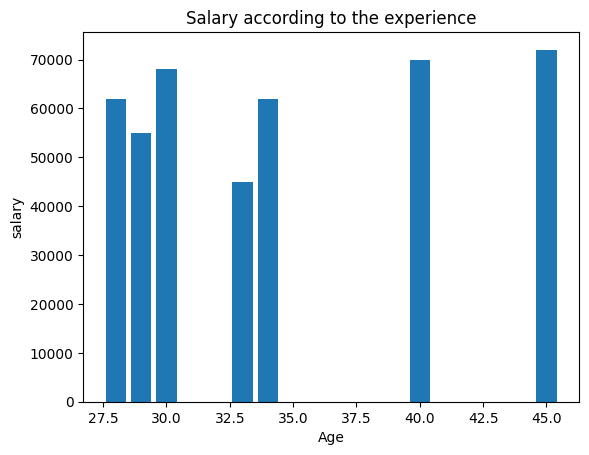

In [ ]:
df = pd.read_csv(r"C:\Users\thoya\Downloads\practice_data.csv")
df["name"] = df["name"].str.lower().str.title().str.strip()
df["age"] = df["age"].replace({"thirty":"30"})
df["gender"] = df["gender"].str.strip()

chan_gen = {
    "male":"Male",
    "FEMALE":"Female",
    "M":"Male",
    "F":"Female"
}
df["gender"] = df["gender"].replace(chan_gen)
df = df.dropna(subset = ["name"])
df["age"] = pd.to_numeric(df["age"] , errors = "coerce")
df["age"] = df["age"].fillna(df["age"].mean().round())
df["salary"] = df["salary"].replace({"not available" :pd.NA})
df["salary"] = pd.to_numeric(df["salary"] , errors = "coerce")
df["salary"] = df["salary"].fillna(df["salary"].mean().round())
df["join_date"].unique()
cor_dates = {
    '10/06/2020' : '2020-06-10',
    '2020/12/01' : '2020-12-01',
    '15-07-2022' : '2022-07-15',
    '2022/09/30' : '2022-09-30',
    '2021-02-29' : pd.NA
}
df["join_date"] = df["join_date"].replace(cor_dates)
df["join_date"] = df["join_date"].fillna(method="ffill")
df["join_date"] = pd.to_datetime(df["join_date"])
df["country"] = df["country"].replace({'United States' : 'USA','US':'USA'})
df = df.drop(columns=["comments"])
df = df.set_index("id")
df.sort_values("salary", inplace = True)
df

x = df["age"]
y = df["salary"]

plt.xlabel("Age")
plt.ylabel("salary")
plt.title("Salary according to the experience")
plt.bar(x,y)
plt.show()

